## 5.2 Exercise: Build your own Sentiment Analysis Model

In [1]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

## Step 1: Get the stemmed data using the same process you did in Week 3.

### Import the movie review data as a data frame and ensure that the data is loaded properly.

In [21]:
# I will use pandas to pull the data to create a data frame to work from
Movie_Data = pd.read_csv('labeledTrainData.tsv',sep = '\t')
Movie_Data

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


## Use TextBlob to classify each movie review as positive or negative. Assume that a polarity score greater than or equal to zero is a positive sentiment and less than 0 is a negative sentiment.

In [22]:
# Next I will import word and TextBlob
from textblob import Word
from textblob import TextBlob

In [23]:
# Next I will determine if the movies are positive or negative and label them as the polarity_score
# and the sentiment_score 
Movie_Data[['polarity_score','sentiment_score']] = Movie_Data['review'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [24]:
Movie_Data

,id,sentiment,review,polarity_score,sentiment_score
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818
...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,0.102083,0.542857
24996,5064_1,0,I don't believe they made this film. Completel...,0.090813,0.462371
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",0.145256,0.484103
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,0.065625,0.504514


In [25]:
# Next I will make a new column for a textblob rating which is based off of the positive and 
# negativescores above.
Movie_Data['textblob_rating'] = Movie_Data['polarity_score'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
Movie_Data

,id,sentiment,review,polarity_score,sentiment_score,textblob_rating
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0
...,...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,0.102083,0.542857,1
24996,5064_1,0,I don't believe they made this film. Completel...,0.090813,0.462371,1
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",0.145256,0.484103,1
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,0.065625,0.504514,1


## Check the accuracy of this model. Is this model better than random guessing?

In [39]:
# Next I will check the accuracy of this model by creating a new variable for accuracy. 
# Which compaires the textblob_rating with the sentiment and use str.lower.
Movie_Data['accuracy_model'] = np.where(Movie_Data['textblob_rating'] == Movie_Data['sentiment'], 1, 0)
Movie_Data['review'] = Movie_Data['review'].str.lower()

In [40]:
Movie_Data

,id,sentiment,review,polarity_score,sentiment_score,textblob_rating,accuracy_model
0,5814_8,1,with stuff going moment mj started listening m...,0.001277,0.606746,1,1
1,2381_9,1,the classic war worlds timothy hines entertain...,0.256349,0.531111,1,1
2,7759_3,0,the film starts manager nicholas bell giving w...,-0.053941,0.562933,0,1
3,3630_4,0,it must assumed praised film greatest filmed o...,0.134753,0.492901,1,0
4,9495_8,1,superbly trashy wondrously unpretentious explo...,-0.024842,0.459818,0,0
...,...,...,...,...,...,...,...
24995,3453_3,0,it seems like consideration gone imdb reviews ...,0.102083,0.542857,1,0
24996,5064_1,0,i believe made film completely unnecessary the...,0.090813,0.462371,1,0
24997,10905_3,0,guy loser can get girls needs build picked str...,0.145256,0.484103,1,0
24998,10194_3,0,this minute documentary bu uel made early one ...,0.065625,0.504514,1,0


## Prepping Text for a Custom Model

### Remove punctuation and special characters from the text.

In [41]:
# I will use the Regex and Lambda function to remove all punctuation and special 
# characters from my review column
Movie_Data['review'] = Movie_Data['review'].apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))
Movie_Data

,id,sentiment,review,polarity_score,sentiment_score,textblob_rating,accuracy_model
0,5814_8,1,with stuff going moment mj started listening m...,0.001277,0.606746,1,1
1,2381_9,1,the classic war worlds timothy hines entertain...,0.256349,0.531111,1,1
2,7759_3,0,the film starts manager nicholas bell giving w...,-0.053941,0.562933,0,1
3,3630_4,0,it must assumed praised film greatest filmed o...,0.134753,0.492901,1,0
4,9495_8,1,superbly trashy wondrously unpretentious explo...,-0.024842,0.459818,0,0
...,...,...,...,...,...,...,...
24995,3453_3,0,it seems like consideration gone imdb reviews ...,0.102083,0.542857,1,0
24996,5064_1,0,i believe made film completely unnecessary the...,0.090813,0.462371,1,0
24997,10905_3,0,guy loser can get girls needs build picked str...,0.145256,0.484103,1,0
24998,10194_3,0,this minute documentary bu uel made early one ...,0.065625,0.504514,1,0


In [42]:
# Next I will remove extra spaces
Movie_Data['review'] = Movie_Data['review'].apply(lambda x: re.sub('\\d|\\W+|_', ' ', x))
Movie_Data

,id,sentiment,review,polarity_score,sentiment_score,textblob_rating,accuracy_model
0,5814_8,1,with stuff going moment mj started listening m...,0.001277,0.606746,1,1
1,2381_9,1,the classic war worlds timothy hines entertain...,0.256349,0.531111,1,1
2,7759_3,0,the film starts manager nicholas bell giving w...,-0.053941,0.562933,0,1
3,3630_4,0,it must assumed praised film greatest filmed o...,0.134753,0.492901,1,0
4,9495_8,1,superbly trashy wondrously unpretentious explo...,-0.024842,0.459818,0,0
...,...,...,...,...,...,...,...
24995,3453_3,0,it seems like consideration gone imdb reviews ...,0.102083,0.542857,1,0
24996,5064_1,0,i believe made film completely unnecessary the...,0.090813,0.462371,1,0
24997,10905_3,0,guy loser can get girls needs build picked str...,0.145256,0.484103,1,0
24998,10194_3,0,this minute documentary bu uel made early one ...,0.065625,0.504514,1,0


### Remove stop words.

In [43]:
# I will download stopwords and then use .apply and lambda to join 
# split and stop my review column
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Robyn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [45]:
# Remove stop words and make lowercase
Movie_Data['review'] = Movie_Data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [46]:
Movie_Data

,id,sentiment,review,polarity_score,sentiment_score,textblob_rating,accuracy_model
0,5814_8,1,stuff going moment mj started listening music ...,0.001277,0.606746,1,1
1,2381_9,1,classic war worlds timothy hines entertaining ...,0.256349,0.531111,1,1
2,7759_3,0,film starts manager nicholas bell giving welco...,-0.053941,0.562933,0,1
3,3630_4,0,must assumed praised film greatest filmed oper...,0.134753,0.492901,1,0
4,9495_8,1,superbly trashy wondrously unpretentious explo...,-0.024842,0.459818,0,0
...,...,...,...,...,...,...,...
24995,3453_3,0,seems like consideration gone imdb reviews fil...,0.102083,0.542857,1,0
24996,5064_1,0,believe made film completely unnecessary first...,0.090813,0.462371,1,0
24997,10905_3,0,guy loser get girls needs build picked stronge...,0.145256,0.484103,1,0
24998,10194_3,0,minute documentary bu uel made early one spain...,0.065625,0.504514,1,0


As seen above I have gotten rid of the stop words in my review column

In [47]:
# Next I will create a new dataframe with reviews and sentiments only
Updated_Movie_Data = pd.DataFrame(Movie_Data[['sentiment','review']])
Updated_Movie_Data.head()

,sentiment,review
0,1,stuff going moment mj started listening music ...
1,1,classic war worlds timothy hines entertaining ...
2,0,film starts manager nicholas bell giving welco...
3,0,must assumed praised film greatest filmed oper...
4,1,superbly trashy wondrously unpretentious explo...


## Apply NLTK’s PorterStemmer

In [48]:
# I will first import word_tokenize and PorterStemmer from nltk to reduce 
# the review variable to its stem per word
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
portstem = PorterStemmer()

In [49]:
# Next I will use .apply and lambda to tokenize my review variable
Updated_Movie_Data['token_review'] = Updated_Movie_Data['review'].apply(lambda x : filter(None,x.split(" ")))
# Then use stem to the token variable
Updated_Movie_Data['stem_review'] = Updated_Movie_Data['token_review'].apply(lambda x : [portstem.stem(y) for y in x])
# Last i will use apply to and lambda to join the data
Updated_Movie_Data['NLTK_review'] = Updated_Movie_Data['stem_review'].apply(lambda x: ' '.join(x))

In [50]:
# First I will print the shape of the text
print(Updated_Movie_Data.shape)
Updated_Movie_Data

(25000, 5)


,sentiment,review,token_review,stem_review,NLTK_review
0,1,stuff going moment mj started listening music ...,<filter object at 0x7ffa5ef94550>,"[stuff, go, moment, mj, start, listen, music, ...",stuff go moment mj start listen music watch od...
1,1,classic war worlds timothy hines entertaining ...,<filter object at 0x7ffa5ef94fa0>,"[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,0,film starts manager nicholas bell giving welco...,<filter object at 0x7ffa5ef94130>,"[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,0,must assumed praised film greatest filmed oper...,<filter object at 0x7ffa5ef94730>,"[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,1,superbly trashy wondrously unpretentious explo...,<filter object at 0x7ffa5ef94d90>,"[superbl, trashi, wondrous, unpretenti, exploi...",superbl trashi wondrous unpretenti exploit hoo...
...,...,...,...,...,...
24995,0,seems like consideration gone imdb reviews fil...,<filter object at 0x7ffa87858ee0>,"[seem, like, consider, gone, imdb, review, fil...",seem like consider gone imdb review film went ...
24996,0,believe made film completely unnecessary first...,<filter object at 0x7ffa87858f40>,"[believ, made, film, complet, unnecessari, fir...",believ made film complet unnecessari first fil...
24997,0,guy loser get girls needs build picked stronge...,<filter object at 0x7ffa87858fa0>,"[guy, loser, get, girl, need, build, pick, str...",guy loser get girl need build pick stronger su...
24998,0,minute documentary bu uel made early one spain...,<filter object at 0x7ffa878ac040>,"[minut, documentari, bu, uel, made, earli, one...",minut documentari bu uel made earli one spain ...


In [51]:
#import word count vectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer
# create a bag of words feature matrix
count = CountVectorizer()
bag_of_word = count.fit_transform(Updated_Movie_Data['NLTK_review'])
# Use shape to view the shape of the output
bag_of_word.shape

(25000, 49642)

## Step 2: Split this into a training and test set.

In [52]:
from sklearn.model_selection import train_test_split
# First I will split into training and test data:
x = Updated_Movie_Data['NLTK_review'] 
y = Updated_Movie_Data['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=0)

## Step 3: Fit and apply the tf-idf vectorization to the training set.

In [53]:
# First the tf idf will be set to the TfidfVectorizer
tf_idf = TfidfVectorizer()
# Then I will apply and fit the tf idf to training data set
x_train_vector = tf_idf.fit_transform(x_train)
# Check the shape of the output
x_train_vector.shape

(20000, 45229)

In [54]:
# Next I will check the dimensions of the data
print("n_samples: %d, n_features: %d" % x_train_vector.shape)

n_samples: 20000, n_features: 45229


In [55]:
# I will use .toarray to view the array
x_train_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Step 4: Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [56]:
# Next I will apply the the transform to the test data set
x_test_vector = tf_idf.transform(x_test)
x_test_vector.shape

(5000, 45229)

In [57]:
# Next I will use .toarray to see the array 
x_test_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Step 5: Train a logistic regression using the training data.

In [58]:
from sklearn.linear_model import LogisticRegression
# Initialize a logistic regression model 
logistic = LogisticRegression()
# Train the model
logistic = logistic.fit(x_train_vector, y_train)

In [59]:
# Next I will print the score of the model
print(logistic.score(x_train_vector, y_train))

0.93005


## Step 6: Find the model accuracy on test set.

In [60]:
from sklearn import metrics
# I will use logistic to predict the x_test_vector 
yhat = logistic.predict(x_test_vector)
# Then I will use metrics to find the accuracy_score for the y_test and yhat
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.8928


## Step 7: Create a confusion matrix for the test set predictions.

In [61]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test, yhat)
print(Confusion_matrix)

[[2242  306]
 [ 230 2222]]


## Step 8: Get the precision, recall, and F1-score for the test set predictions.

In [62]:
# I will import classification_report and use my yhat to pull the 
# classification_report with the y_test
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2548
           1       0.88      0.91      0.89      2452

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



As seen above we can see the accuracy, macro avg, and weighted avg for the precision, recall, f1-score, support for 0 and 1. As we see 0 has the highest precision at 0.91 and 1 had the highest at 0.91 for recall.

## Step 9: Create a ROC curve for the test set.

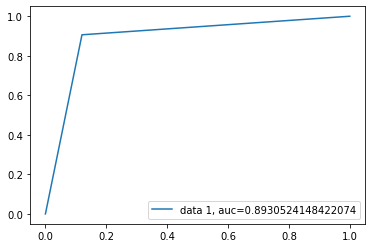

In [63]:
# I will import matplotlib.pyplot and set my fpr, tpr, _ equal to the metrics.roc_curve
# for the y_test, yhat probability 
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, yhat)
auc = metrics.roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Step 10: Pick another classification model you learned about this week and repeat steps (5) – (9).

## Step 10.5: Train a KNeighborsClassifier Regression model using the training data.

In [64]:
# First I will initialize a KNeighborsClassifier model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_fit = knn.fit(x_train_vector, y_train)

In [65]:
# Next I will make a prediction with my training data
y_pred = knn_fit.predict(x_train_vector)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [66]:
# I will now use metrics to show the model accuracy on the train set
print(metrics.accuracy_score(y_train, y_pred))

0.8626


## Step 10.6: Find the model accuracy on test set.

In [67]:
# Next I will make a prediction with my test data
y_test_pred = knn_fit.predict(x_test_vector)
y_test_pred

array([1, 1, 0, ..., 1, 0, 0])

In [68]:
# I will now use metrics to show the model accuracy on the test set
print(metrics.accuracy_score(y_test, y_test_pred))

0.7848


## Step 10.7: Create a confusion matrix for the test set predictions.

In [69]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(Confusion_matrix)

[[1872  676]
 [ 400 2052]]


## Step 10.8: Get the precision, recall, and F1-score for the test set predictions.

In [70]:
# I will import classification_report and use my yhat to pull the 
# classification_report with the y_test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78      2548
           1       0.75      0.84      0.79      2452

    accuracy                           0.78      5000
   macro avg       0.79      0.79      0.78      5000
weighted avg       0.79      0.78      0.78      5000



As seen above we can see the accuracy, macro avg, and weighted avg for the precision, recall, f1-score, support for 0 and 1.As we see 0 has the highest precision at 0.82 and 1 has the highest recall at 0.84 and f1-score at 0.79.

## Step 10.9: Create a ROC curve for the test set.

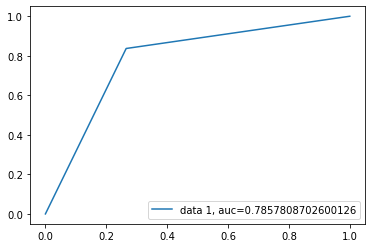

In [71]:
# I will import matplotlib.pyplot and set my fpr, tpr, _ equal to the metrics.roc_curve
# for the y_test, yhat probability 
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

As seen above we see that as our ROC reaches 0.2 and 0.8 it has a slight rise to 1.0